In [1]:
from MalardClient.DataSetQuery import DataSetQuery
from MalardClient.AsyncDataSetQuery import AsyncDataSetQuery 
import datetime
import MalardClient.MalardHelpers as mh

%matplotlib inline
from datetime import datetime

environmentName = 'DEVv2'
#Sets the URL of the Malard ServiceGateway.
query = DataSetQuery('http://localhost:9000',environmentName)
queryAsync = AsyncDataSetQuery('ws://localhost:9000',environmentName)


In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pandas as pd
from math import floor

from matplotlib.collections import PatchCollection

def createPatch( ax, gminX, gmaxX, gminY, gmaxY ):
    
    inner_gminx = gminX + 10000
    inner_gmaxx = gmaxX - 10000
    inner_gminy = gminY + 10000
    inner_gmaxy = gmaxY - 10000
    
    inner_polygon = plt.Polygon([[inner_gminx, inner_gminy], [inner_gmaxx , inner_gminy], [inner_gmaxx ,inner_gmaxy], [inner_gminx, inner_gmaxy], [inner_gminx,inner_gminy]],color=None,ec='black') 
    return inner_polygon
    
    
def generateGridCellImage( parentDataSet, dataSet, region, size = 15 ):

    bbox = json.loads(query.getDataSetBoundingBox( parentDs,dataSet,region ))
    
    print(bbox)
    
    #Setup the bounding box
    minX = bbox['gridCellMinX']
    maxX = bbox['gridCellMaxX']
    minY = bbox['gridCellMinY']
    maxY = bbox['gridCellMaxY']
    minT = datetime(2011,1,1,0,0,0)#datetime.fromtimestamp( bbox['minTime'] )
    maxT = datetime(2011,3,31,23,59,59)#datetime.fromtimestamp( bbox['maxTime'] )
    
    print("MinT={} MaxT={}".format(minT, maxT) )

    gcs = json.loads(query.getGridCells(  parentDs,dataSet,region,minX,maxX,minY,maxY,minT,maxT ))
     
    df = pd.DataFrame(gcs)
   
    fig = plt.figure(figsize=(size,size))

    offset = 100000
    
    cmap = plt.get_cmap('Spectral')
    colors = cmap(df['totalPoints'])
    
    print(df['totalPoints'])

    ax = fig.add_subplot(111, xlim=(minX - offset, maxX + offset), ylim=(minY - offset, maxY + offset))
    ax.set_title('{} 100km Grid Cells'.format(region))
    ax.set_xlabel("X Coordinate (m)")
    ax.set_ylabel("Y Coordinate (m)")

    step_size = 100000 * floor( (maxX+100000 - minX)/(6*100000) ) + 100000
    
    r = np.arange(minX, maxX+100000, step_size)
    ax.set_xticks(r)

    gridcells = zip( df['gridCellMinX'], df['gridCellMaxX'], df['gridCellMinY'], df['gridCellMaxY'] )

    #for gminX, gmaxX, gminY,gmaxY in gridcells:    
    #    polygon = plt.Polygon([[gminX, gminY], [gmaxX, gminY], [gmaxX, gmaxY], [gminX, gmaxY], [gminX, gminY]],color='white',ec='black')
    #    ax.add_patch(polygon)
    
    patches = [ createPatch(ax, gminX, gmaxX, gminY,gmaxY ) for gminX, gmaxX, gminY,gmaxY in gridcells ]
    
    collection = PatchCollection(patches)
    ax.add_collection(collection)
    collection.set_color(colors)
    
    fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=df['totalPoints'].min(),vmax=df['totalPoints'].max()),cmap=cmap),ax=ax,label="Total Points")
    
    ax.autoscale_view()
    
    return fig

{'gridCellMinX': -700000, 'gridCellMaxX': 900000, 'gridCellMinY': -3400000, 'gridCellMaxY': -600000, 'minTime': 1296537366, 'maxTime': 1467299742, 'totalPoints': 4986781805, 'numberOfShards': 6658}
MinT=2011-01-01 00:00:00 MaxT=2011-03-31 23:59:59
0        44837
1       156988
2        85019
3        73806
4       294066
5         7167
6      1014463
7       640167
8        90024
9       264458
10      208755
11     1671098
12      597636
13     1027010
14      816178
15      957999
16     2820399
17     3221770
18      162850
19     2160861
20     1903526
21     1816983
22     1371839
23     1916280
24     4777802
25       14160
26     4097512
27      192624
28       10234
29     1702363
        ...   
190     475481
191    1362338
192     975020
193    5517976
194    2436024
195     488191
196    3390505
197    3468304
198    3342058
199    3480324
200    4053649
201    4476317
202    2107894
203    1426721
204     795443
205      43743
206     722761
207    2436085
208    3386287
20

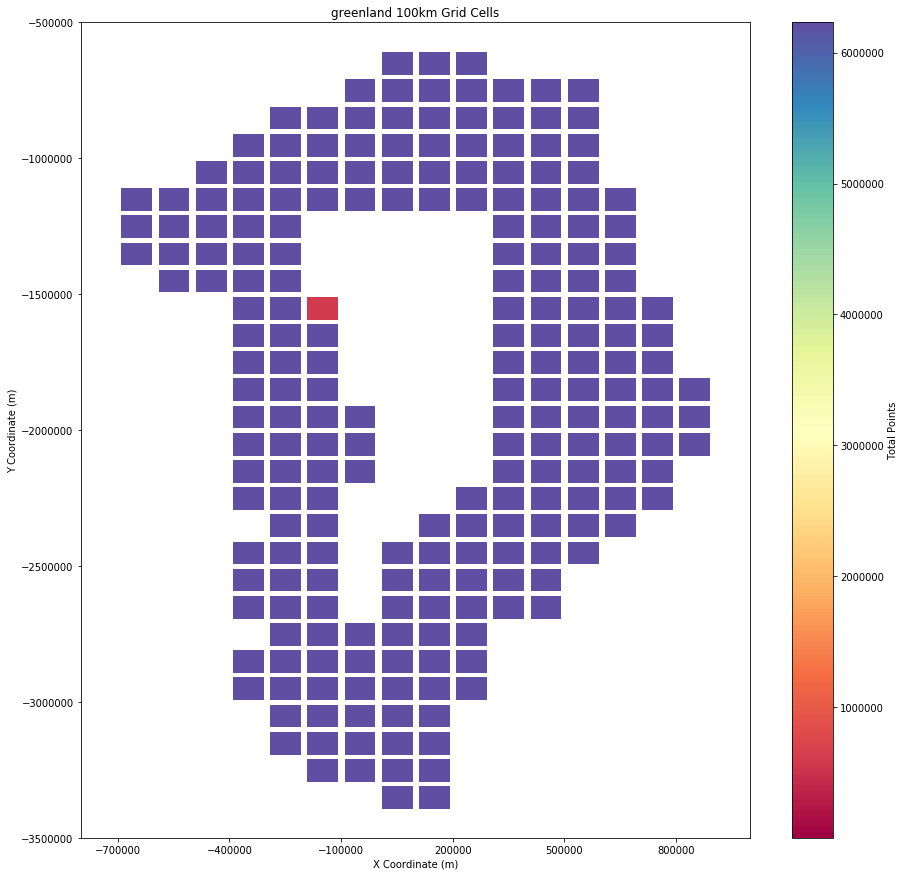

In [9]:

parentDs = 'cryotempo'
dataSet = 'GRIS_BaselineC_Q2'
region='greenland'

#mtngla = generateGridCellImage(parentDs,dataSet,region)
#mtngla.savefig('greenland2.png')

resG = generateGridCellImage('cryotempo','GRIS_BaselineC_Q2','greenland')
#resG.savefig('greenland_2011.png')

#resA = generateGridCellImage('cryotempo','AIS_BaselineC_FilteredPC','antarctic')
#resA.savefig('antarctic_2011.png')

#oibG = generateGridCellImage('cryotempo','oib','greenland')


In [37]:
dir(type(ax))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_axes_class',
 '_convert_dx',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_view',
 '_init_axis',
 '_make_twin_axes',
 '_on_units_changed',
 '_parse_scatter_color_args',
 '_pcolorargs',
 '_process_unit_info',
 '_prop_order',
 '_quiver_units',
 '_remove_legend',
 '_sci',
 '_set_artist_props',
 '_set_gc_clip',
 '_set_lim_and_transforms',
 '_set_position',
 '_set_title_offset_trans',
 '_set_view',
 '_set_view_from_bbox',
 '_shared_x_axes',
 '_shared_y_axes',
 '_twinned_axes',
 '_update_image_limits',
 '_update_line_limits',
 '_update_patch_limits'

In [139]:

from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27018')

db = client['cryotempo']

collection = db.catalogue

rows = collection.aggregate([{'$match' : {'dsName':'GRIS_BaseC_Q2'}},{'$group' : { '_id' :  None, 'minLat' : {'$min':'$minLat'}, 'maxLat' :{'$max':'$maxLat'}, 'minLon' : {'$min':'$minLon'}, 'maxLon' :{'$max':'$maxLon'} }}])

print('Greenland Extent')
for row in rows:
    print(row)

rows = collection.aggregate([{'$match' : {'dsName':'AIS_BaselineC_FilteredPC'}},{'$group' : { '_id' :  None, 'minLat' : {'$min':'$minLat'}, 'maxLat' :{'$max':'$maxLat'}, 'minLon' : {'$min':'$minLon'}, 'maxLon' :{'$max':'$maxLon'} }}])

print('Antarctic Extent')
for row in rows:
    print(row)

    

Greenland Extent
{'_id': None, 'minLat': 60.05982837462768, 'maxLat': 83.65934528735883, 'minLon': 286.9447062840197, 'maxLon': 348.9215804798771}
Antarctic Extent
{'_id': None, 'minLat': -88.13821772109429, 'maxLat': -61.002671160589095, 'minLon': 1.0044843686904741e-07, 'maxLon': 359.99999987528423}


In [142]:
collection = db.swathDetails

results = collection.find()

for i, r in enumerate(results):
    if i < 10:
        print(r)


{'_id': ObjectId('5d383b49fb0ee047e4c9d3a2'), 'datasetName': 'GRIS_BaseC_Q2', 'region': 'greenland', 'catalogueName': 'catalogue', 'swathName': 'CS_LTA__SIR_SIN_2S_20110315T155232_20110315T155240_C001.nc', 'swathId': 7, 'year': 2011, 'month': 3, 'pointCount': 111988, 'insertTime': datetime.datetime(2019, 7, 24, 12, 4, 41), 'gridCells': [{'projection': 'NPS', 'x': -100000, 'y': -2100000, 'pointCount': 6135}, {'projection': 'NPS', 'x': -200000, 'y': -2100000, 'pointCount': 5159}, {'projection': 'NPS', 'x': -200000, 'y': -2000000, 'pointCount': 38423}, {'projection': 'NPS', 'x': -100000, 'y': -2000000, 'pointCount': 49649}]}
{'_id': ObjectId('5d383b49fb0ee047e4c9d3a1'), 'datasetName': 'GRIS_BaseC_Q2', 'region': 'greenland', 'catalogueName': 'catalogue', 'swathName': 'CS_LTA__SIR_SIN_2S_20130627T094822_20130627T094850_C001.nc', 'swathId': 2, 'year': 2013, 'month': 6, 'pointCount': 108126, 'insertTime': datetime.datetime(2019, 7, 24, 12, 4, 41), 'gridCells': [{'projection': 'NPS', 'x': 7000